In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from sklearn.linear_model import LogisticRegression, SGDClassifier, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

%matplotlib inline

In [2]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

In [9]:
from imblearn.over_sampling import SMOTE

In [10]:
d = pd.read_csv('bank_marketing_data_feature_engineered.csv')

In [11]:
d.shape

(41084, 15)

In [12]:
d.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'campaign', 'cons_conf_idx', 'euribor_3_month',
       'deposit', 'age_bucket', 'previous_campaign'],
      dtype='object')

In [14]:
c=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'campaign', 'cons_conf_idx', 'euribor_3_month', 'age_bucket', 'previous_campaign']

In [15]:
X = d[c]

In [16]:
X.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'campaign', 'cons_conf_idx', 'euribor_3_month',
       'age_bucket', 'previous_campaign'],
      dtype='object')

In [17]:
y = d.deposit

In [18]:
X.shape

(41084, 14)

In [19]:
y.shape

(41084,)

#### Since we have negative value in one feature, will normalise using Min Max Scalar

In [20]:
X_norm = MinMaxScaler().fit_transform(X)

C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [19]:
##Also, converting to Standard Scalar

In [21]:
ss = StandardScaler()
Xs = ss.fit_transform(X)

C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


#### Feature Selection using select k best F_classif, and Chi square:

In [22]:
cols = list(X.columns)
# build the selector (we'll build one with each score type)
skb_f = SelectKBest(f_classif, k=5)
skb_chi2 = SelectKBest(chi2, k=5)
X_norm = MinMaxScaler().fit_transform(X)
# train the selector on data
skb_f.fit(Xs, y)
skb_chi2.fit(X_norm, y)

# To examine results
kbest = pd.DataFrame([cols, list(skb_f.scores_), list(skb_chi2.scores_)], 
                     index=['feature','f_classif','chi2score']).T.sort_values('f_classif', ascending=False)
kbest_chisquare = pd.DataFrame([cols, list(skb_f.scores_), list(skb_chi2.scores_)], 
                     index=['feature','f_classif','chi2score']).T.sort_values('chi2score', ascending=False)
#fclassif
kbest

C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,feature,f_classif,chi2score
11,euribor_3_month,4287.25,888.147
13,previous_campaign,1593.2,1323.8
6,contact,877.874,313.512
3,default,410.694,160.999
9,campaign,182.336,32.0261
10,cons_conf_idx,123.366,10.722
1,marital,88.0234,5.94511
7,month,56.6158,7.26756
2,education,29.9616,1.69346
0,job,25.8836,8.15754


In [23]:
#Ranked by chi 2 values:
kbest_chisquare

,feature,f_classif,chi2score
13,previous_campaign,1593.2,1323.8
11,euribor_3_month,4287.25,888.147
6,contact,877.874,313.512
3,default,410.694,160.999
9,campaign,182.336,32.0261
10,cons_conf_idx,123.366,10.722
0,job,25.8836,8.15754
7,month,56.6158,7.26756
1,marital,88.0234,5.94511
4,housing,5.52828,2.50383


In [23]:
#### Feature selection RFE

In [24]:
from sklearn.feature_selection import RFECV


lr = LogisticRegression()
selector = RFECV(lr, step=1, cv=10)
selector = selector.fit(X_norm, y)

print(selector.support_)
print(selector.ranking_)


C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

[False False False False False False False False False False False  True
 False False]
[10  7 11  4 13 14  5  6 12  3  2  1  8  9]


C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [25]:
rfecv_columns = np.array(X.columns)[selector.support_]
rfecv_columns

array(['euribor_3_month'], dtype=object)

In [26]:
#### Checking Lasso and Ridge

In [27]:
#optimal lasso
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(Xs, y)

print(optimal_lasso.alpha_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.004960468965202983


In [28]:
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, Xs, y, cv=10)

print(lasso_scores)
print(np.mean(lasso_scores))

[-0.08517642 -0.03233033 -0.05767556 -0.06820438 -0.01834665 -0.0858082
 -0.07732901 -0.13490956 -0.02084661 -0.38165977]
-0.09622864930559993


In [29]:
lasso.fit(Xs, y)

Lasso(alpha=0.004960468965202983, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [30]:
lasso_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs

,variable,coef,abs_coef
11,euribor_3_month,-0.095739,0.095739
10,cons_conf_idx,0.039348,0.039348
13,previous_campaign,0.010820,0.010820
7,month,0.009141,0.009141
3,default,-0.006016,0.006016
6,contact,0.005920,0.005920
1,marital,-0.001163,0.001163
9,campaign,-0.000839,0.000839
0,job,0.000000,0.000000
2,education,0.000000,0.000000


In [ ]:
#lasso scores are negative 

In [36]:
#### Ridge

In [31]:
#optimal ridge
ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(Xs, y)

print(optimal_ridge.alpha_)

31440.354715915


In [32]:
#cross-validate r2
ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge_scores = cross_val_score(ridge, Xs, y, cv=10)

print(ridge_scores)
print(np.mean(ridge_scores))

[-9.95888993e-02 -4.21771930e-02 -6.67475031e-03  1.65638515e-04
 -1.00391135e-02 -1.02134894e-01 -5.45515277e-02 -5.61916920e-02
  9.33585628e-03 -5.14064916e-01]
-0.0875921491157339


In [33]:
ridge.fit(Xs, y)

Ridge(alpha=31440.354715915, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [34]:
ridge_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':ridge.coef_,
                            'abs_coef':np.abs(ridge.coef_)})

ridge_coefs.sort_values('abs_coef', inplace=True, ascending=False)

ridge_coefs

,variable,coef,abs_coef
11,euribor_3_month,-0.048474,0.048474
10,cons_conf_idx,0.019599,0.019599
13,previous_campaign,0.019372,0.019372
6,contact,0.013002,0.013002
3,default,-0.010165,0.010165
9,campaign,-0.006249,0.006249
1,marital,-0.005562,0.005562
7,month,0.004539,0.004539
12,age_bucket,0.003597,0.003597
0,job,0.002889,0.002889


In [35]:
#### Feature selection using random forest feature importance:
rf = RandomForestClassifier()
rf.fit(Xs, y)

C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [55]:
importances = rf.feature_importances_
importances

array([0.12709295, 0.04674598, 0.06461441, 0.012912  , 0.04475847,
       0.03186124, 0.01760731, 0.03924637, 0.07763624, 0.11727222,
       0.08688431, 0.23697157, 0.06915513, 0.02724181])

In [36]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X.columns,
                                    columns=['importance'])
feature_importances.sort_values(by='importance', ascending=False)

,importance
euribor_3_month,0.239058
job,0.122482
campaign,0.114861
day_of_week,0.079202
cons_conf_idx,0.073168
age_bucket,0.068371
education,0.064009
housing,0.048677
marital,0.048233
month,0.045544


In [ ]:
## Taking top 5 features from lasso, Ridge, F classif, chi2

In [37]:
# In seleckbest features top 5 are same for f classif and ch 2
# euribor_3_month	4287.25	888.147
# 13	previous_campaign	1593.2	1323.8
# 6	contact	877.874	313.512
# 3	default	410.694	160.999
# 9	campaign	182.336	32.0261

In [37]:
c = ['euribor_3_month', 'previous_campaign', 'contact', 'default', 'campaign']

In [38]:
X = d[c]

In [39]:
X.columns

Index(['euribor_3_month', 'previous_campaign', 'contact', 'default',
       'campaign'],
      dtype='object')

In [40]:
y = d.deposit

In [41]:
ss = StandardScaler()
Xs = ss.fit_transform(X)

C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [42]:
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.33, random_state=0, stratify = y)

In [43]:
print("Number Of Observations X_train dataset: ", X_train.shape)
print("Number Of Observations y_train dataset: ", y_train.shape)
print("Number Of Observations X_test dataset: ", X_test.shape)
print("Number Of Observations y_test dataset: ", y_test.shape)

Number Of Observations X_train dataset:  (27526, 5)
Number Of Observations y_train dataset:  (27526,)
Number Of Observations X_test dataset:  (13558, 5)
Number Of Observations y_test dataset:  (13558,)


In [44]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

Before OverSampling, counts of label '1': 3109
Before OverSampling, counts of label '0': 24417 



In [45]:
sm = SMOTE(random_state=2)
X_train_resample, y_train_resample = sm.fit_sample(X_train, y_train.ravel())

In [46]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_resample.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_resample.shape))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_resample==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_resample==0)))

After OverSampling, the shape of train_X: (48834, 5)
After OverSampling, the shape of train_y: (48834,) 

After OverSampling, counts of label '1': 24417
After OverSampling, counts of label '0': 24417


In [47]:
parameters = {
    'C': np.linspace(1, 10, 10)
             }
lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)
clf.fit(X_train_resample, y_train_resample.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    1.6s
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed:    2.3s finished
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=3,
       param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=5)

In [48]:
clf.best_params_

{'C': 1.0}

In [49]:
clf.best_estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [50]:
lr = LogisticRegression(C=1, verbose=0)
lr.fit(X_train_resample, y_train_resample.ravel())

C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [51]:
cross_val_score(lr, X_train_resample, y_train_resample, cv =5)

C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

array([0.71867322, 0.71457821, 0.72281384, 0.71236945, 0.7134958 ])

In [52]:
lr.fit(X_train_resample, y_train_resample)

C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [53]:
yhat = lr.predict(X_test)

In [54]:
print(confusion_matrix(y_test, yhat))

[[8661 3366]
 [ 458 1073]]


In [55]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.95      0.72      0.82     12027
           1       0.24      0.70      0.36      1531

   micro avg       0.72      0.72      0.72     13558
   macro avg       0.60      0.71      0.59     13558
weighted avg       0.87      0.72      0.77     13558



In [56]:
lr.score(X_test, y_test)

0.717952500368786

In [57]:
tmp = lr.fit(X_train_resample, y_train_resample)

C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [59]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the train dataset: 70.08491182233834%


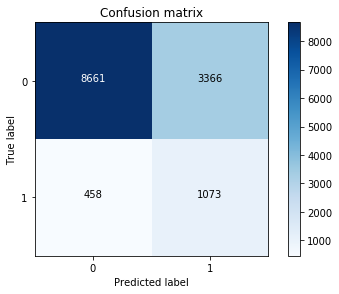

In [61]:

yhat = lr.predict(X_test)

cnf_matrix_tra = confusion_matrix(y_test, yhat)

print("Recall metric in the train dataset: {}%".format(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])))


class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()

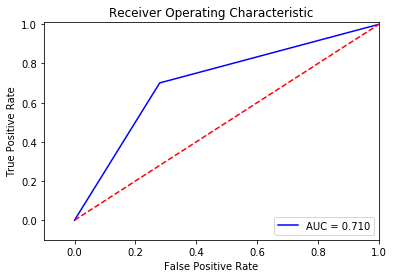

In [62]:

fpr, tpr, thresholds = roc_curve(y_test, yhat)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

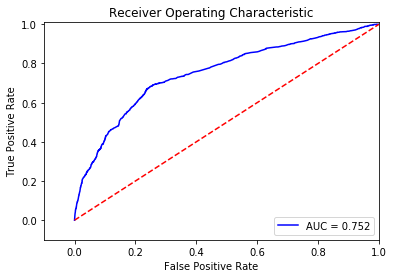

In [63]:
y_pred_sample_score = tmp.decision_function(X_test)


fpr, tpr, thresholds = roc_curve(y_test, y_pred_sample_score)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [89]:
rf1 = RandomForestClassifier(n_estimators=100)

In [92]:
rf1.fit(X_train_resample, y_train_resample)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [91]:
cross_val_score(rf1, X_train_resample, y_train_resample, cv = 5)

array([0.76568013, 0.81634653, 0.82036456, 0.81566053, 0.82389259])

In [93]:
yhatr = rf1.predict(X_test)

In [94]:
rf1.score(X_test,y_test)

0.8378224890475418

In [95]:
confusion_matrix(y_test, yhatr)

array([[9669, 1265],
       [ 734,  658]], dtype=int64)

In [96]:
print(classification_report(y_test, yhatr))

              precision    recall  f1-score   support

           0       0.93      0.88      0.91     10934
           1       0.34      0.47      0.40      1392

   micro avg       0.84      0.84      0.84     12326
   macro avg       0.64      0.68      0.65     12326
weighted avg       0.86      0.84      0.85     12326



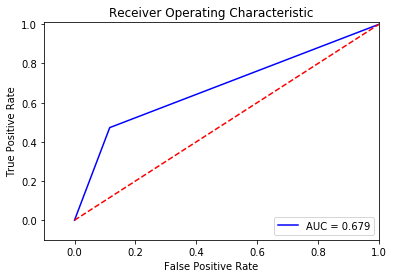

In [106]:
fpr, tpr, thresholds = roc_curve(y_test, yhatr)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [97]:
from xgboost import XGBClassifier

In [98]:
xg = XGBClassifier(n_estimators=50)

In [99]:
cross_val_score(xg, X_train_resample, y_train_resample, cv = 5)

array([0.75303802, 0.75558604, 0.75382203, 0.75245002, 0.75548804])

In [105]:
mdl = xg.fit( X_train_resample, y_train_resample)

In [101]:
yhatx = xg.predict(X_test)

In [102]:
xg.score(X_test, y_test)

0.8197306506571475

In [103]:
confusion_matrix(y_test, yhatx)

array([[9250, 1684],
       [ 538,  854]], dtype=int64)

In [104]:
print(classification_report(y_test, yhatx))

              precision    recall  f1-score   support

           0       0.95      0.85      0.89     10934
           1       0.34      0.61      0.43      1392

   micro avg       0.82      0.82      0.82     12326
   macro avg       0.64      0.73      0.66     12326
weighted avg       0.88      0.82      0.84     12326



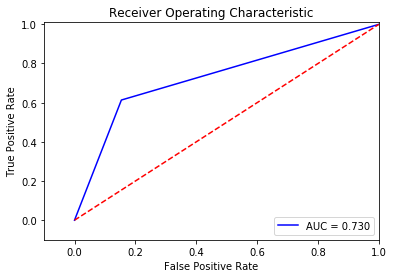

In [107]:
fpr, tpr, thresholds = roc_curve(y_test, yhatx)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [108]:
knn = KNeighborsClassifier()
cross_val_score(knn, X_train_resample, y_train_resample, cv =5)

array([0.72334379, 0.75676205, 0.77097217, 0.76048608, 0.76999216])

In [109]:
knn.fit(X_train_resample, y_train_resample)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [110]:
knn.score(X_test, y_test)

0.858348207042025

In [113]:
yhatk = knn.predict(X_test)

In [114]:
confusion_matrix(y_test, yhatk)

array([[9994,  940],
       [ 806,  586]], dtype=int64)

In [115]:
print(classification_report(y_test, yhatk))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92     10934
           1       0.38      0.42      0.40      1392

   micro avg       0.86      0.86      0.86     12326
   macro avg       0.65      0.67      0.66     12326
weighted avg       0.86      0.86      0.86     12326



In [ ]:
score_pred_y_xg = xg.decision_function(X_test)

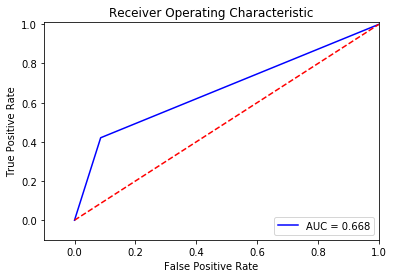

In [116]:
fpr, tpr, thresholds = roc_curve(y_test, yhatk)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [117]:
sv = LinearSVC()

In [118]:
cross_val_score(sv, X_train_resample, y_train_resample, cv =10)

C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

array([0.72128577, 0.73304586, 0.72089377, 0.72108977, 0.72089377,
       0.72265778, 0.72148177, 0.70776166, 0.71442572, 0.7252058 ])

In [119]:
sv.fit(X_train_resample, y_train_resample)

C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [120]:
yhatc = sv.predict(X_test)

In [121]:
sv.score(X_test, y_test)

0.7157228622424144

In [122]:
confusion_matrix(y_test, yhatc)

array([[7857, 3077],
       [ 427,  965]], dtype=int64)

In [123]:
print(classification_report(y_test, yhatc))

              precision    recall  f1-score   support

           0       0.95      0.72      0.82     10934
           1       0.24      0.69      0.36      1392

   micro avg       0.72      0.72      0.72     12326
   macro avg       0.59      0.71      0.59     12326
weighted avg       0.87      0.72      0.77     12326



In [124]:
score_pred_y = sv.decision_function(X_test)

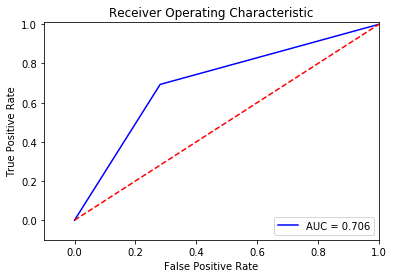

In [125]:
fpr, tpr, thresholds = roc_curve(y_test, yhatc)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

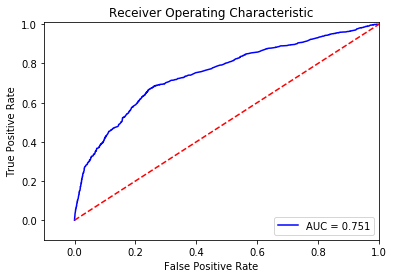

In [126]:
fpr, tpr, thresholds = roc_curve(y_test, score_pred_y)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()